### Könyvtárak importálása

In [17]:
#----------Fájkezelés----------
import numpy as np
import pandas as pd
import os
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

#----------Vizualizáció----------
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#----------Klaszterezés----------
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

### Értékesítés dataset beolvasása

In [14]:
df = pd.read_excel('Értékesítés2016.xlsx', parse_dates=['datum'])

df['bevetel'] = df.eladott_mennyiseg*df.eladasi_ar
df['koltseg'] = df.eladott_mennyiseg*df.beszerzesi_ar
df['profit'] = df.eladott_mennyiseg*(df.eladasi_ar - df.beszerzesi_ar)

df.head()

,datum,arucikk_id,gyarto,gepcsoport,funkcio,eladasi_ar,eladott_mennyiseg,beszerzesi_ar,ugyfel_id,varos,bevetel,koltseg,profit
0,2016-01-01 18:51:28,4590,Bosch,Gép,Fúrókalapács,54323,1,49760,12174,Piliscsév,54323,49760,4563
1,2016-01-01 23:01:25,5994,GYS,Gép,Volfrámelektródás inverteres DC hegesztő,69400,1,52267,12175,Visegrád,69400,52267,17133
2,2016-01-02 10:05:12,6225,Skil,Gép,Gyomláló,14165,1,11512,12177,Veresegyház,14165,11512,2653
3,2016-01-02 17:37:21,8071,Zarges,Létrák,Létra,62094,1,50076,12180,Visegrád,62094,50076,12018
4,2016-01-03 11:49:45,1105,Makita,Gép,Fűkasza,100709,1,92851,12185,Kokad,100709,92851,7858


### Kategória és szám

In [16]:
klaszter_proba = pd.DataFrame(df.groupby(by='funkcio').sum().profit).reset_index()
klaszter_proba.head()

,funkcio,profit
0,Akkumulátor,344246
1,Akkumulátortöltő járművekhez,96014
2,Akkumulátortöltő szerszámgépekhez,105557
3,Akkumulátortöltő-indító,166934
4,Akkus csavarbehajtó,15361


### KPrototypes klaszterezés

Text(0.5, 1.0, 'funkcio by profit')

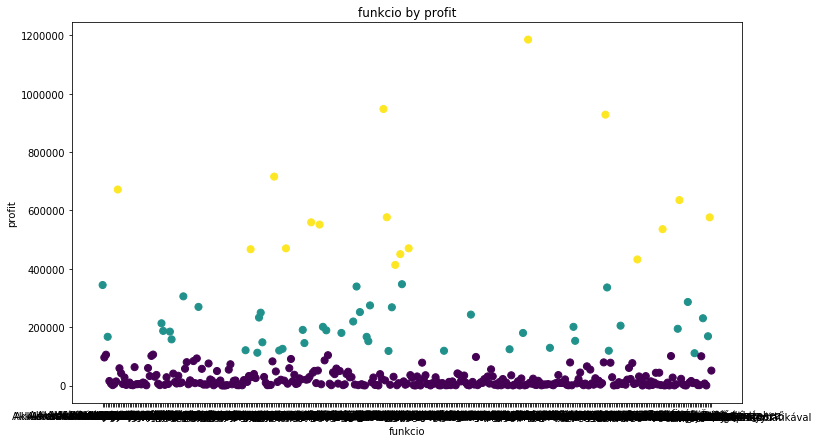

In [17]:
kp = KPrototypes(n_clusters=3)
clusters = kp.fit_predict(klaszter_proba, categorical=[0])

klaszter_proba['klaszter'] = kp.labels_

plt.figure(figsize=(12, 7))
plt.scatter(klaszter_proba.iloc[:, 0], klaszter_proba.iloc[:, 1], c=clusters, s=50, cmap='viridis')
plt.xlabel(klaszter_proba.columns[0])
plt.ylabel(klaszter_proba.columns[1])
plt.title(klaszter_proba.columns[0] + ' by ' + klaszter_proba.columns[1])

###  
###  
###  
### Kategória és kategória

In [45]:
kategoriak = df.loc[:, ['gepcsoport', 'gyarto']]
kategoriak.head()

,gepcsoport,gyarto
0,Gép,Bosch
1,Gép,GYS
2,Gép,Skil
3,Létrák,Zarges
4,Gép,Makita


### KModes klaszterezés

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1427, cost: 3071.0
Run 1, iteration: 2/100, moves: 0, cost: 3071.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 556, cost: 2305.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 364, cost: 3128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 4783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1427, cost: 3111.0
Run 5, iteration: 2/100, moves: 0, cost: 3111.0
Best run was number 2
[3 3 2 ... 2 2 2]


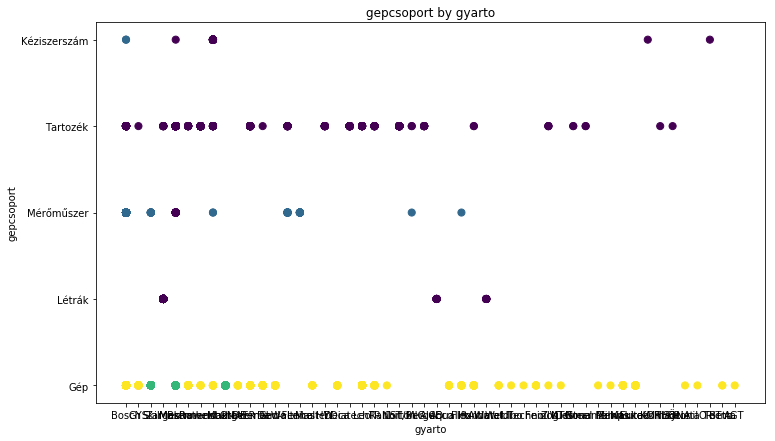

In [48]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(kategoriak)

kategoriak['klaszter'] = km.labels_

plt.figure(figsize=(12, 7))
plt.scatter(kategoriak.iloc[:, 1], kategoriak.iloc[:, 0], c=clusters, s=50, cmap='viridis')
plt.xlabel(kategoriak.columns[1])
plt.ylabel(kategoriak.columns[0])
plt.title(kategoriak.columns[0] + ' by ' + kategoriak.columns[1])

print(km.labels_)

In [50]:
kategoriak[kategoriak.gyarto == 'Bosch'].head()

,gepcsoport,gyarto,klaszter
0,Gép,Bosch,3
11,Gép,Bosch,3
14,Gép,Bosch,3
17,Mérőműszer,Bosch,1
21,Gép,Bosch,3


In [6]:
termek_eladas = pd.DataFrame(df.groupby(by='arucikk_id').sum().eladott_mennyiseg.sort_values(ascending=False)).reset_index()
termek_eladas.head()

,arucikk_id,eladott_mennyiseg
0,4262,240
1,10255,123
2,3907,108
3,6062,102
4,5413,100


Text(0.5, 1.0, 'arucikk_id by eladott_mennyiseg')

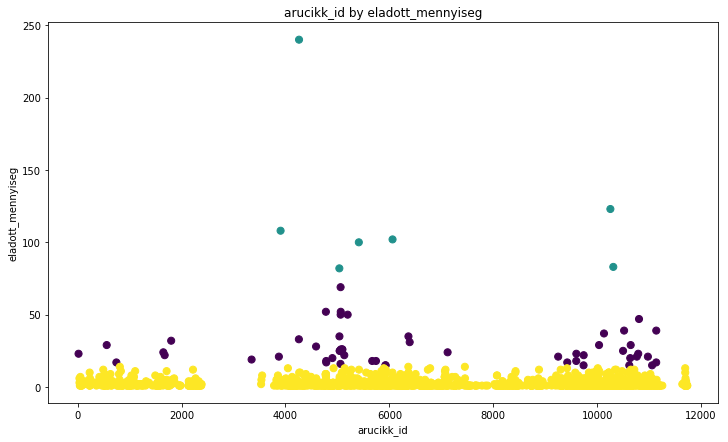

In [12]:
kp = KPrototypes(n_clusters=3)
clusters = kp.fit_predict(termek_eladas, categorical=[0])

termek_eladas['klaszter'] = kp.labels_

plt.figure(figsize=(12, 7))
plt.scatter(termek_eladas.iloc[:, 0], termek_eladas.iloc[:, 1], c=clusters, s=50, cmap='viridis')
plt.xlabel(termek_eladas.columns[0])
plt.ylabel(termek_eladas.columns[1])
plt.title(termek_eladas.columns[0] + ' by ' + termek_eladas.columns[1])